### Regresión Lasso (L1)

In [1]:
# Importamos las librerías a utilizar
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Definir grado del polinomio
degree = 18

In [3]:
# Establecer una semilla para el generador de números aleatorios para reproducibilidad
np.random.seed(600)

In [4]:
# Generar valores de x convertidos de grados a radianes, desde 60 hasta 300 grados con pasos de 4 grados
x = np.array([i*np.pi/180 for i in range(60,300,4)])

In [5]:
# Generar valores de y como la función seno de x más ruido normal con media 0 y desviación estándar de 0.15
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [6]:
data = pd.DataFrame(x,columns=['x'])

In [7]:
#Crear distintas columnas para cada grado
for i in range(2,degree+1):  #power of 1 is already there
   print(i)
   colname = 'x_%d'%i      #new var will be x_power
   data[colname] = data['x']**i

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [13]:
# Inicializar y entrenar el modelo de regresión Lasso con un valor alpha de 0.01
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(data, y)


/home/diego10/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.700e-01, tolerance: 3.704e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [14]:
# Predecir y usando el modelo entrenado
y_pred = lasso_reg.predict(data)

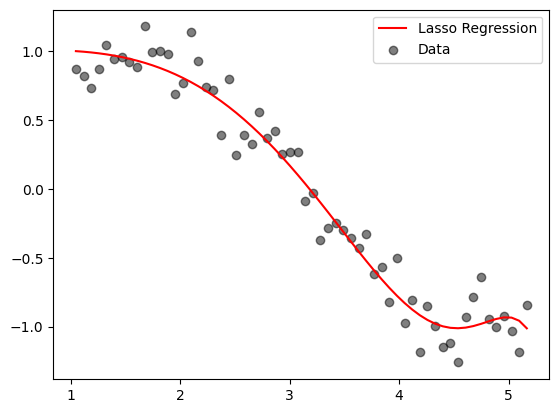

In [21]:
# Visualizar los resultados
plt.tight_layout()
plt.plot(x, y_pred, color='red', label='Lasso Regression')
plt.scatter(x, y, color='black', alpha=0.5, label='Data')
plt.legend()
plt.show()